In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM
import os
# --- Load dataset ---
csv_path = "/content/infolimpioavanzadoTarget.csv"  # Change this to your actual filename
df = pd.read_csv(csv_path)

print("Columns:", df.columns)
print(df.head())
'''
# --- Preprocessing ---
# Assuming there's a 'Date' column and a 'Close' column
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Use only 'Close' price for now
data = df[['Close']].values

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# --- Create sequences ---
def create_sequences(data, n_steps=30):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 30
X, y = create_sequences(data_scaled, n_steps)

# --- Train/test split ---
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- Build model ---
model = Sequential([
    Flatten(input_shape=(n_steps, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# --- Train model ---
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# --- Predict and inverse scale ---
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual")
plt.plot(predicted_prices, label="Predicted")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
'''

Columns: Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)
         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN 

'\n# --- Preprocessing ---\n# Assuming there\'s a \'Date\' column and a \'Close\' column\ndf[\'Date\'] = pd.to_datetime(df[\'Date\'])\ndf.sort_values(\'Date\', inplace=True)\n\n# Use only \'Close\' price for now\ndata = df[[\'Close\']].values\n\n# Normalize\nscaler = MinMaxScaler()\ndata_scaled = scaler.fit_transform(data)\n\n# --- Create sequences ---\ndef create_sequences(data, n_steps=30):\n    X, y = [], []\n    for i in range(n_steps, len(data)):\n        X.append(data[i-n_steps:i])\n        y.append(data[i])\n    return np.array(X), np.array(y)\n\nn_steps = 30\nX, y = create_sequences(data_scaled, n_steps)\n\n# --- Train/test split ---\nsplit = int(0.8 * len(X))\nX_train, X_test = X[:split], X[split:]\ny_train, y_test = y[:split], y[split:]\n\n# --- Build model ---\nmodel = Sequential([\n    Flatten(input_shape=(n_steps, 1)),\n    Dense(64, activation=\'relu\'),\n    Dense(32, activation=\'relu\'),\n    Dense(1)\n])\n\nmodel.compile(optimizer=\'adam\', loss=\'mse\')\nmodel.summar

In [18]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [2]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [8]:
# --- Select relevant columns ---
features = [
    "open", "high", "low", "volume",
    "RSIadjclose15", "RSIvolume15",
    "stochastic-k-15", "stochastic-d-15",
    "volumenrelativo", "diff", "INCREMENTO"  # 12 total
]

# Just clean the full set first
df.dropna(subset=features + ["close"], inplace=True)
df['volumenrelativo'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["volumenrelativo"], inplace=True)


# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df["close"].values.reshape(-1, 1))


# --- Create sequences ---
def create_sequences(X, y, n_steps):
    X_seq, y_seq = [], []
    for i in range(n_steps, len(X)):
        X_seq.append(X[i-n_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

n_steps = 15
X, y = create_sequences(X_scaled, y_scaled, n_steps)
num_features = X.shape[2]  # This will be 11

# --- Train/test split ---
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#--------model ------
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(n_steps, num_features)),
    LSTM(50, return_sequences=False),  # Last LSTM layer, no need to return sequences
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for stock price prediction
])

model.compile(optimizer='adam', loss='mse')

model.summary()
print(f"X_train shape: {X_train.shape}")
# Should output: (samples, 15, 11)

print(X.shape)

<ipython-input-8-142c049364ca>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['volumenrelativo'].replace([np.inf, -np.inf], np.nan, inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 15, 100)             │          44,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,301 (298.05 KB)

 Trainable params: 76,301 (298.05 KB)

 Non-trainable params: 0 (0.00 B)

X_train shape: (5508, 15, 11)
(6885, 15, 11)


In [9]:
df['volumenrelativo'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["volumenrelativo"], inplace=True)


# Check for NaNs
print(df[features].isna().sum())  # Any column with NaNs?

# Check for Infs
print(np.isinf(df[features]).sum())  # Any column with Infs?

open               0
high               0
low                0
volume             0
RSIadjclose15      0
RSIvolume15        0
stochastic-k-15    0
stochastic-d-15    0
volumenrelativo    0
diff               0
INCREMENTO         0
dtype: int64
open               0
high               0
low                0
volume             0
RSIadjclose15      0
RSIvolume15        0
stochastic-k-15    0
stochastic-d-15    0
volumenrelativo    0
diff               0
INCREMENTO         0
dtype: int64


<ipython-input-9-d2711d79c9d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['volumenrelativo'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [17]:
import time

# Start time
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# End time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Total Training Time: {training_time:.2f} seconds")


Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9103e-04 - val_loss: 4.8813e-06
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8494e-04 - val_loss: 5.8414e-06
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6810e-04 - val_loss: 6.9363e-06
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0582e-04 - val_loss: 1.4196e-05
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4998e-04 - val_loss: 1.2118e-05
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7263e-04 - val_loss: 5.3933e-06
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5077e-04 - val_loss: 1.4738e-05
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6548e-04 - val_loss: 1.1392e-04
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3279e-04 - val_loss: 3.0199e-05
Epoch 10/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9095e-04 - val_loss: 5.0318e-06
Epoch 11/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

In [10]:
# --- Train ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0071 - val_loss: 4.2329e-05
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0016 - val_loss: 5.3241e-05
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - val_loss: 2.2004e-05
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 2.6560e-05
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4462e-04 - val_loss: 1.3302e-05
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - val_loss: 1.0734e-04
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9910e-04 - val_loss: 3.0136e-04
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6403e-04 - val_loss: 1.1460e-05
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8137e-04 - val_loss: 6.6303e-06
Epoch 10/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7858e-04 - val_loss: 9.5831e-05
Epoch 11/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4936e-04 - val_

In [11]:
print(y_scaled.shape)  # Should be (1174, 1)


(6900, 1)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


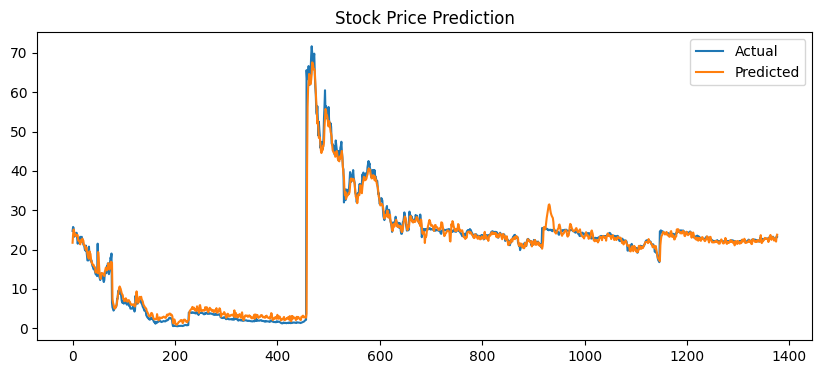

In [12]:
# Predict
y_pred = model.predict(X_test)

# Inverse scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


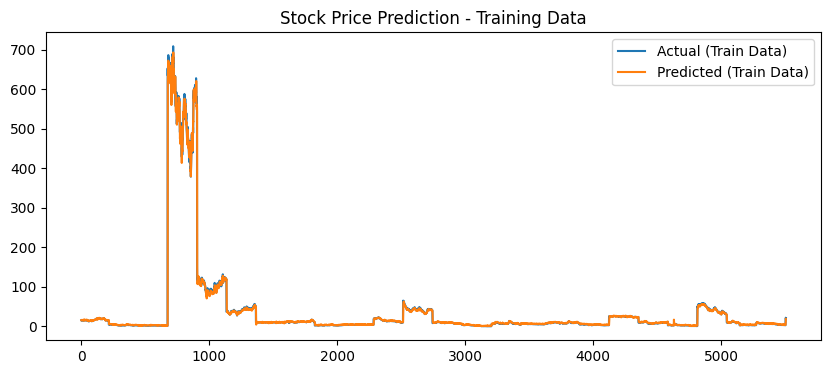

In [14]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Inverse scale the predictions
y_train_pred_rescaled = scaler_y.inverse_transform(y_train_pred)
y_train_rescaled = scaler_y.inverse_transform(y_train)

# Plot actual vs predicted for training data
plt.figure(figsize=(10, 4))
plt.plot(y_train_rescaled, label="Actual (Train Data)")
plt.plot(y_train_pred_rescaled, label="Predicted (Train Data)")
plt.legend()
plt.title("Stock Price Prediction - Training Data")
plt.show()


In [15]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print("Train R²:", train_r2)
print("Test R²:", test_r2)


173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train R²: 0.9895148817488539
Test R²: 0.9717725174118192


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate errors
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = mse ** 0.5
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mape = (abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)).mean() * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.9527
Mean Squared Error (MSE): 4.8315
Root Mean Squared Error (RMSE): 2.1981
R² Score: 0.9718
Mean Absolute Percentage Error (MAPE): 17.24%
